# Assignment 4

In lesson 6, we talked about how to carry out emotion analysis with **NRC (National Research Council Canada) Emotion Lexicon**. In this assignment, you'll need to apply the similar approach on a different corpus, namely **Jane Austen's "Emma"**.

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-02-26-09-37-39-732402.jpeg)


**Question 1. (20 points)** Load the sentences of Jane Austen's "Emma" as lists from NLTK **Gutenburg** corpus. In this Assignment, for simplicity, we regard each sentence as a "line" from the raw text. Print the first 20 sentences / lines.

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-02-26-10-29-49-122343.jpeg)

In [0]:
import nltk# TODO: your code here
import string
import spacy

In [61]:
nltk.download('gutenberg')
nltk.download('punkt')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [62]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

## ** Question 1 Answer:**

In [63]:
emma_sentences= nltk.corpus.gutenberg.sents('austen-emma.txt')
for i in emma_sentences[:20]:
  print(i)

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']']
['VOLUME', 'I']
['CHAPTER', 'I']
['Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty', '-', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.']
['She', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate', ',', 'indulgent', 'father', ';', 'and', 'had', ',', 'in', 'consequence', 'of', 'her', 'sister', "'", 's', 'marriage', ',', 'been', 'mistress', 'of', 'his', 'house', 'from', 'a', 'very', 'early', 'period', '.']
['Her', 'mother', 'had', 'died', 'too', 'long', 'ago', 'for', 'her', 'to', 'have', 'more', 'than', 'an', 'indistinct', 'remembrance', 'of', 'her', 'caresses', ';', 'and', 'her', 'place', 'had', 'been', 'supp

In [0]:
from nltk.tokenize import RegexpTokenizer
inilist = []
seclist = []
for i in range(len(emma_sentences)):
  inilist.append(' '.join(emma_sentences[i]))
tokenizer = RegexpTokenizer(r'\w+')
for i in inilist:
  str_lower = str(i).lower()
  seclist.append(tokenizer.tokenize(str_lower))
punfree = []
for value in range(len(seclist)):
  punfree.append(seclist[value])

**Question 2. (20 points)** Make a Pandas Dataframe `df`. It should contain two columns. One is the line number (named `line`, starting from 0), the other is the `word`. Convert all the words in lower cases, and get rid of all punctuations. Print the first 10 rows of `df`.

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-02-26-10-30-21-041702.jpeg)

In [0]:
import pandas as pd

In [68]:
df = pd.DataFrame(punfree)# TODO: your code here
df.head()

,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
0,emma,by,jane,austen,1816,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,volume,i,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,chapter,i,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,emma,woodhouse,handsome,clever,and,rich,with,a,comfortable,home,...,None,None,None,None,None,None,None,None,None,None
4,she,was,the,youngest,of,the,two,daughters,of,a,...,None,None,None,None,None,None,None,None,None,None


## **Question 2 Answer:**

In [69]:
df = df.stack().reset_index(level=0)
df.columns = ['line', 'word']
df.reset_index(drop=True, inplace=True)
df.head(10)

,line,word
0,0,emma
1,0,by
2,0,jane
3,0,austen
4,0,1816
5,1,volume
6,1,i
7,2,chapter
8,2,i
9,3,emma


**Question 3. (20 points)** Load the data from the [NRC Emotion Lexicon](https://github.com/wshuyi/info-5731-public/raw/master/NRC_emotion_lexicon_list.txt) into a Pandas Dataframe `nrc`. Make the words as index, different emotions as column names, and fill in the values correspondingly. Print the first 5 rows of `nrc`.

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-02-26-10-33-10-259893.jpeg)

In [70]:
!wget https://raw.githubusercontent.com/wshuyi/info-5731-public/master/NRC_emotion_lexicon_list.txt

--2019-03-06 03:57:14--  https://raw.githubusercontent.com/wshuyi/info-5731-public/master/NRC_emotion_lexicon_list.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2579144 (2.5M) [text/plain]
Saving to: ‘NRC_emotion_lexicon_list.txt.3’

NRC_emotion_lexicon 100%[===================>]   2.46M  --.-KB/s    in 0.1s    

2019-03-06 03:57:14 (24.6 MB/s) - ‘NRC_emotion_lexicon_list.txt.3’ saved [2579144/2579144]



##**Question 3 Answer:**

In [71]:
nrc = pd.read_csv("NRC_emotion_lexicon_list.txt", sep='\t', header=None)
nrc.columns = ['word', 'emotion', 'values']
nrc = nrc.pivot(index='word',columns='emotion',values='values')
nrc.head()

emotion,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
word,,,,,,,,,,
NaN,0,0,0,0,0,0,0,0,0,0
aback,0,0,0,0,0,0,0,0,0,0
abacus,0,0,0,0,0,0,0,0,0,1
abandon,0,0,0,1,0,1,0,1,0,0
abandoned,1,0,0,1,0,1,0,1,0,0


In [0]:
nrc.tail()

emotion,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
word,,,,,,,,,,
zone,0,0,0,0,0,0,0,0,0,0
zoo,0,0,0,0,0,0,0,0,0,0
zoological,0,0,0,0,0,0,0,0,0,0
zoology,0,0,0,0,0,0,0,0,0,0
zoom,0,0,0,0,0,0,0,0,0,0


**Question 4. (20 points)** Join `df` and `nrc` together. Sum the values of different emotions on each line, and put the result into a new Dataframe `new_df`. Print the first 5 rows of `new_df`.

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-02-26-10-35-02-167561.jpeg)

In [74]:
new_df = df.join(nrc, how='left', on='word')
new_df.fillna(0, inplace=True)
new_df.head()

,line,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,0,emma,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,by,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,jane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,austen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##**Question 4 Answer:**

In [75]:
new_df = new_df.drop(columns=['word']).groupby('line').sum()
new_df.head()

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
line,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,2.0,1.0,1.0,2.0,1.0,4.0,1.0,2.0,2.0
4,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0


**Question 5. (20 points)** Make a plot of emotions "anger", "anticipation", "disgust", "fear", "joy", "sadness", "surprise" and "trust" from the first 500 lines. Put each emotion into a different **subplot**. All the subplots should share one single x axis.

![](https://github.com/wshuyi/github_pub_img/raw/master/assets/2019-02-26-10-43-10-202460.png)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f64369f7908>,
      dtype=object)

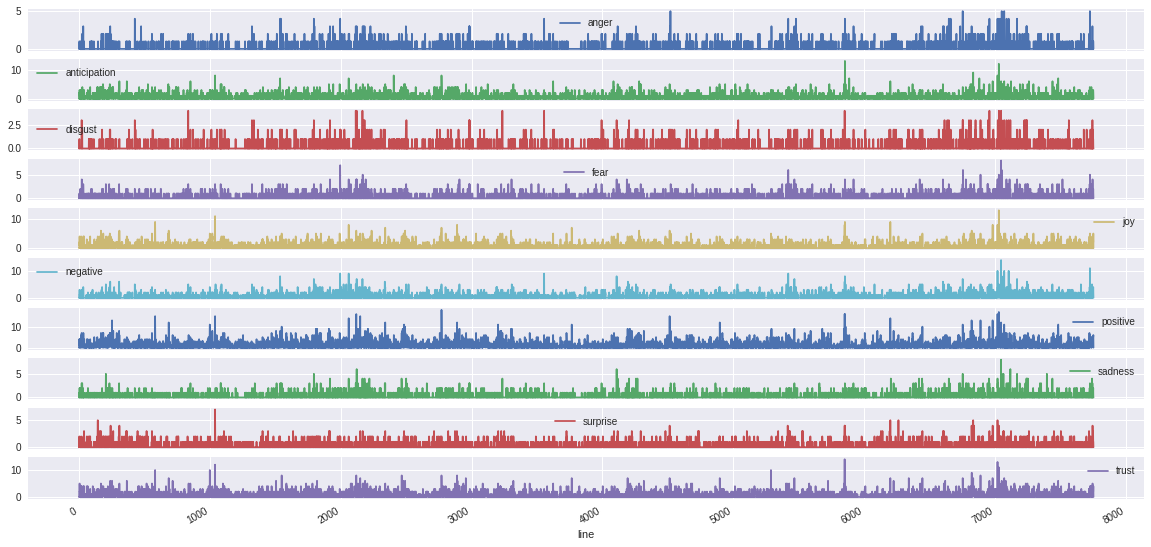

In [79]:
new_df.plot(subplots=True, figsize=(20, 10))# TODO: your code here

##**Question 5 Answer:**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6436de9588>,
      dtype=object)

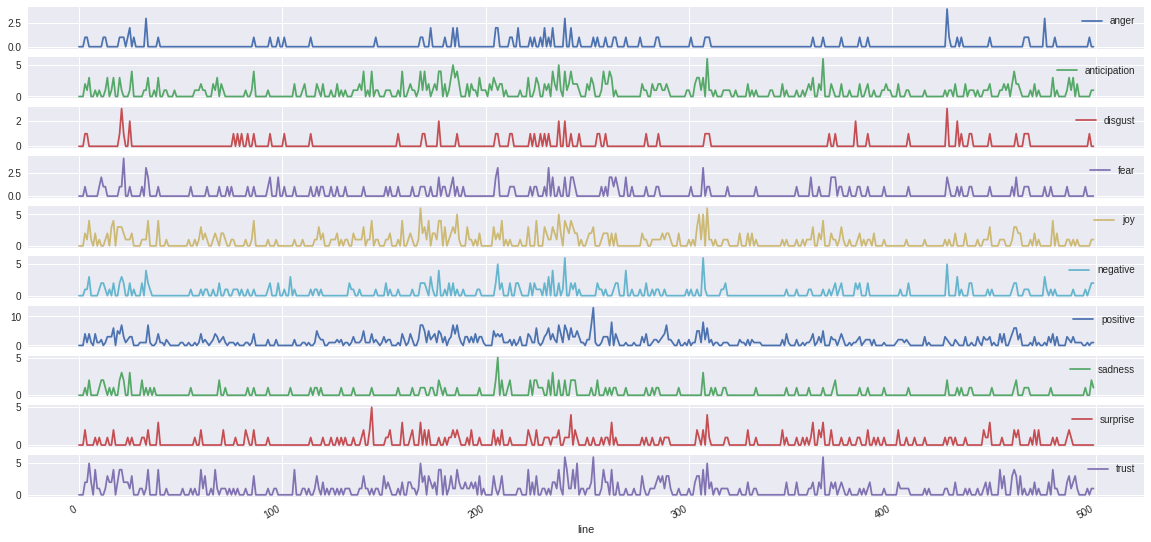

In [78]:
figset=new_df.head(500)
figset.plot(subplots=True, figsize=(20, 10))